### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Laden und Aufbereiten der Trainingsdaten:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1500, activation='relu'),
    Dense(10, activation='softmax')
])

Ausgabe der Netzstruktur:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 1500)              8113500   
                                                                 
 dense_1 (Dense)             (None, 10)                15010     
                                                                 
Total params: 8,128,830
Trainable params: 8,128,830
Non-trainable params: 0
______________________________________________

Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 23s 2s/step - loss: 0.9388 - accuracy: 0.7461 - val_loss: 0.3520 - val_accuracy: 0.8973
Epoch 2/50
10/10 [==============================] - 21s 2s/step - loss: 0.3172 - accuracy: 0.9063 - val_loss: 0.2617 - val_accuracy: 0.9277
Epoch 3/50
10/10 [==============================] - 20s 2s/step - loss: 0.2395 - accuracy: 0.9310 - val_loss: 0.1994 - val_accuracy: 0.9412
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 0.1848 - accuracy: 0.9461 - val_loss: 0.1569 - val_accuracy: 0.9541
Epoch 5/50
10/10 [==============================] - 20s 2s/step - loss: 0.1472 - accuracy: 0.9575 - val_loss: 0.1249 - val_accuracy: 0.9631
Epoch 6/50
10/10 [==============================] - 20s 2s/step - loss: 0.1203 - accuracy: 0.9657 - val_loss: 0.1079 - val_accuracy: 0.9693
Epoch 7/50
10/10 [==============================] - 20s 2s/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.0903 - val_accuracy: 0.9728
Epoch 8/50
10/10 [==

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.03939587622880936
Test accuracy: 0.9878000020980835


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

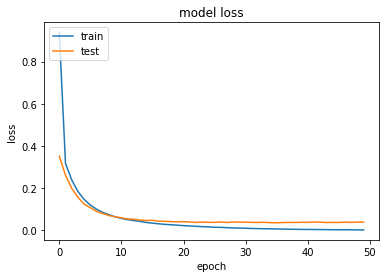

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

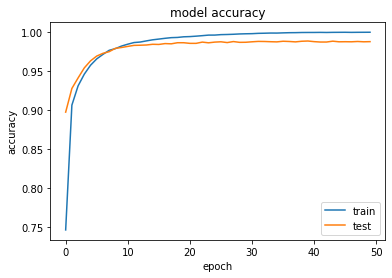

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

313/313 [==============================] - 3s 11ms/step
122 out of 10000 false classifications in test dataset ( 1.22 % )


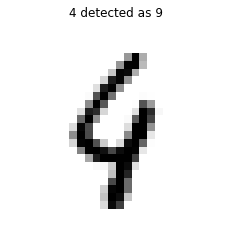

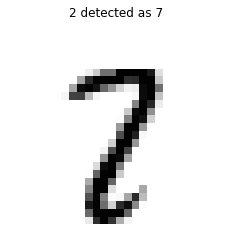

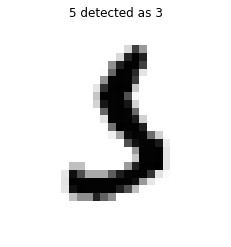

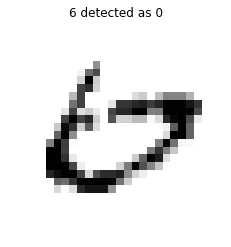

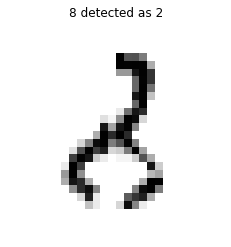

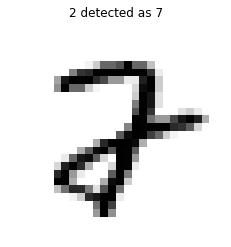

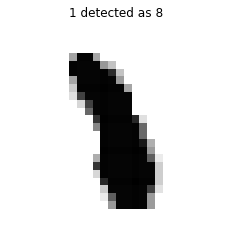

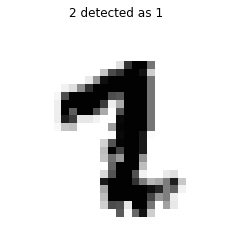

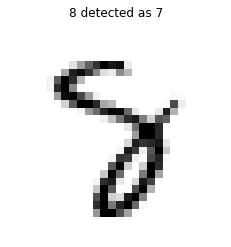

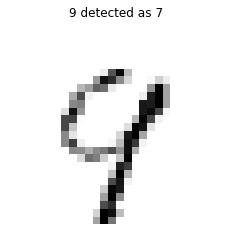

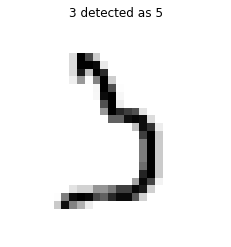

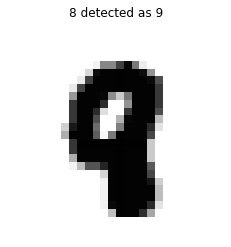

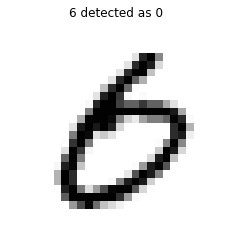

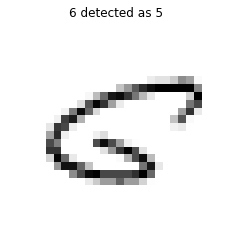

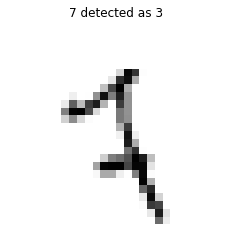

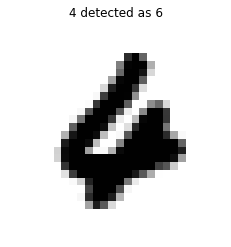

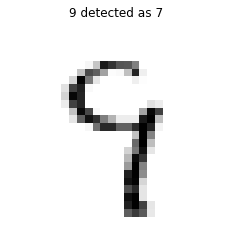

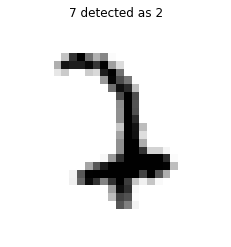

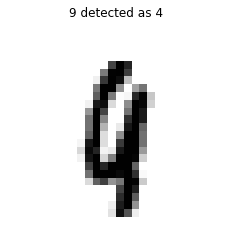

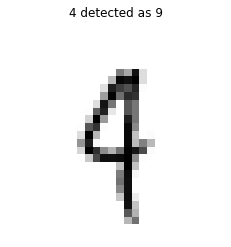

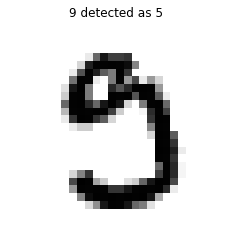

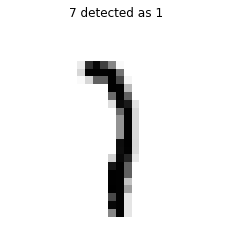

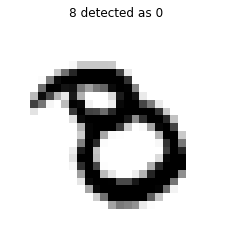

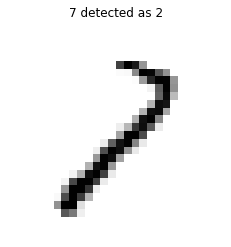

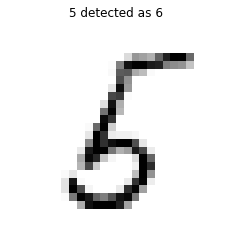

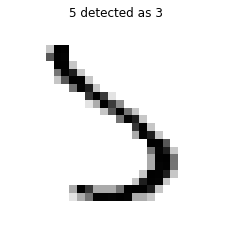

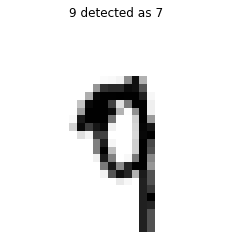

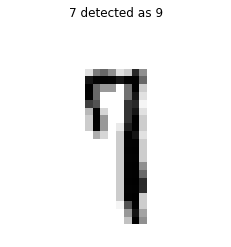

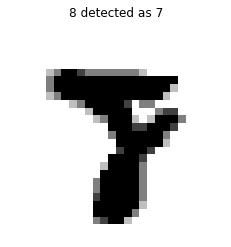

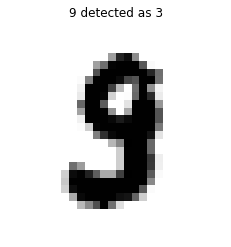

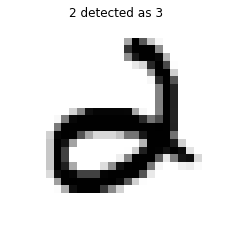

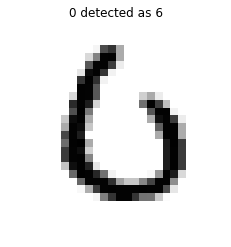

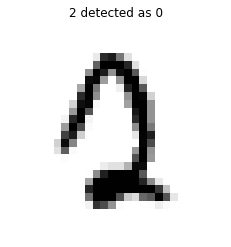

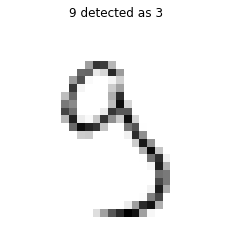

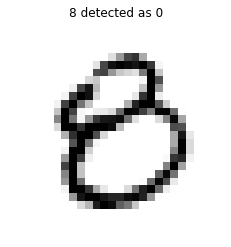

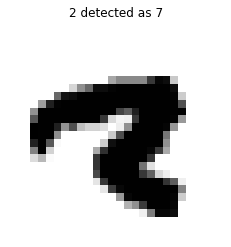

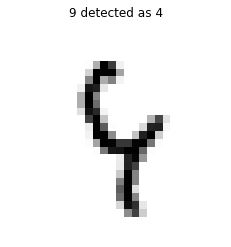

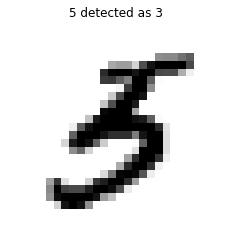

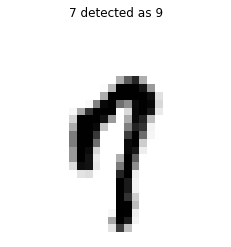

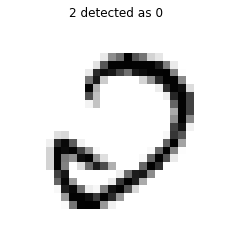

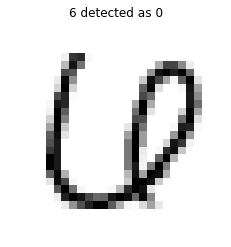

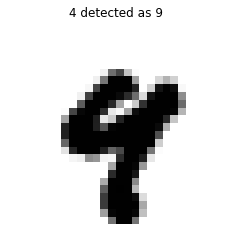

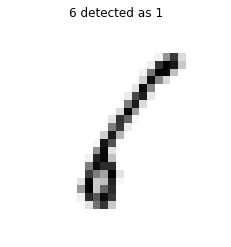

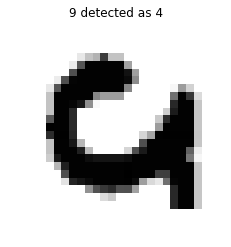

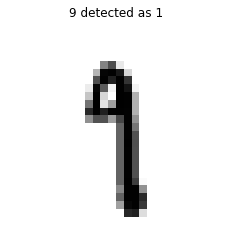

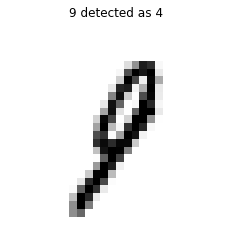

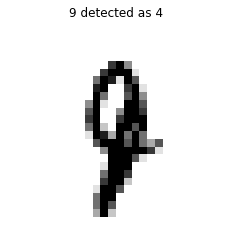

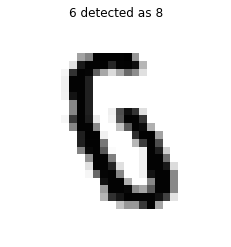

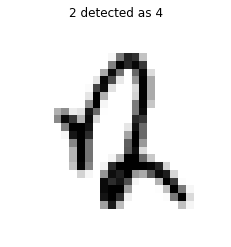

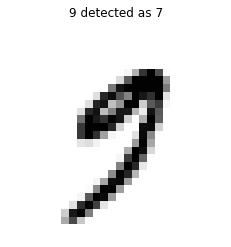

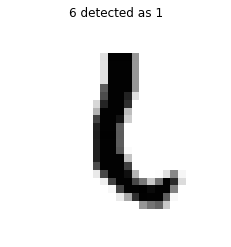

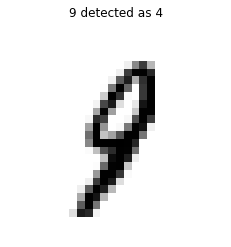

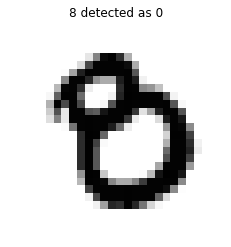

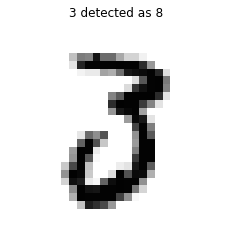

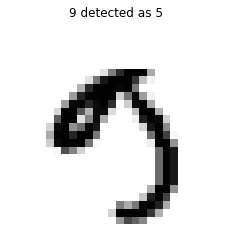

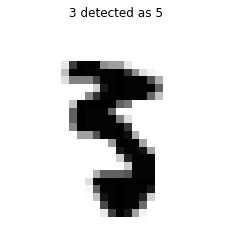

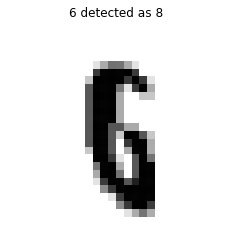

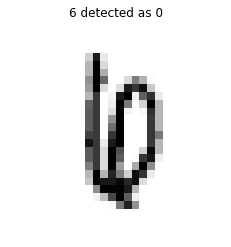

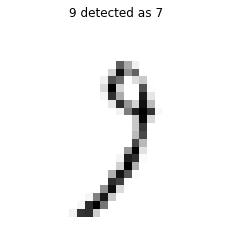

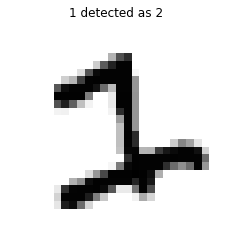

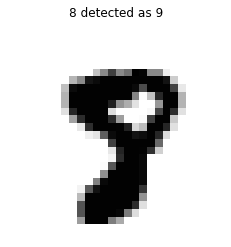

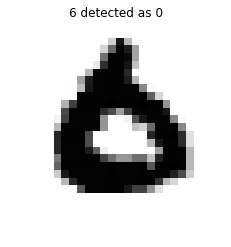

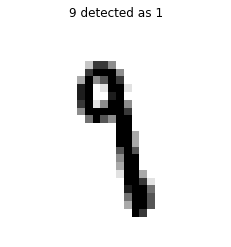

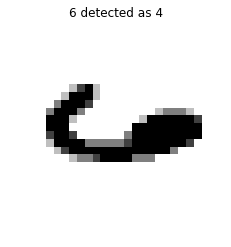

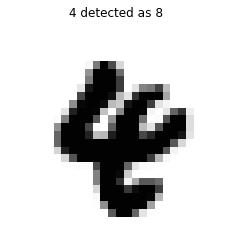

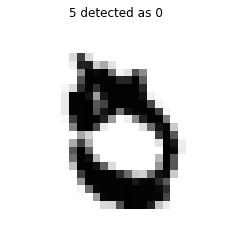

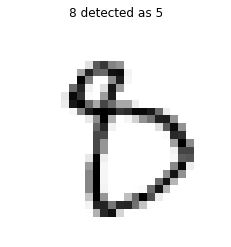

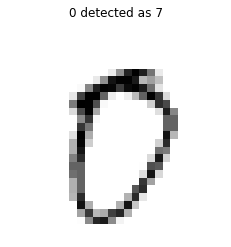

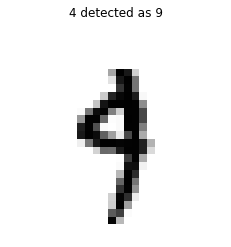

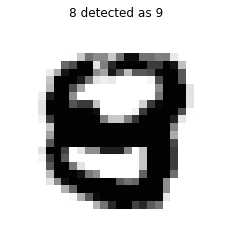

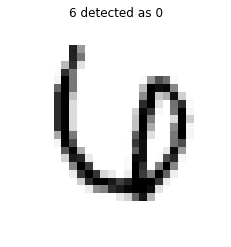

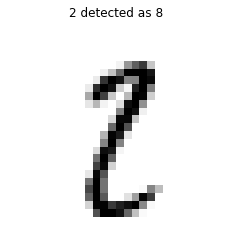

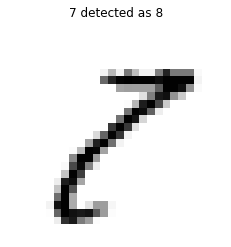

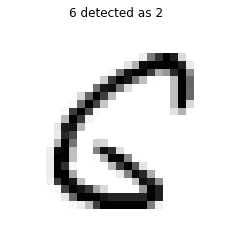

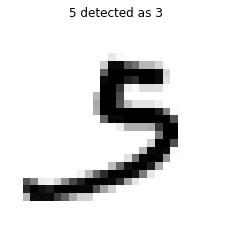

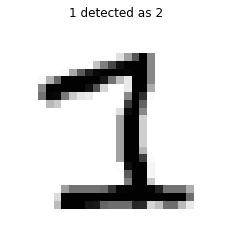

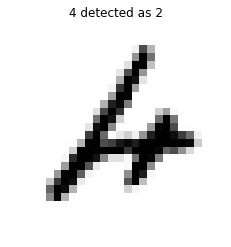

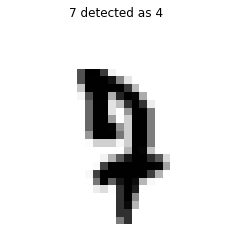

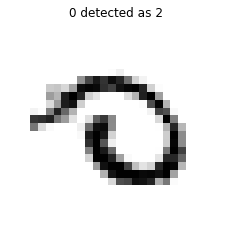

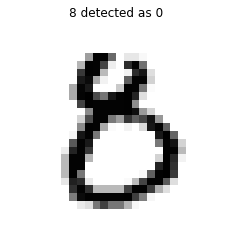

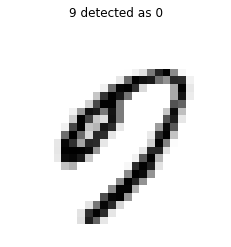

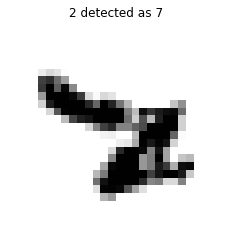

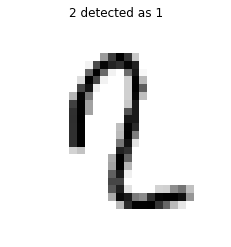

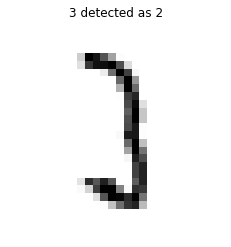

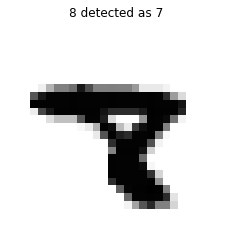

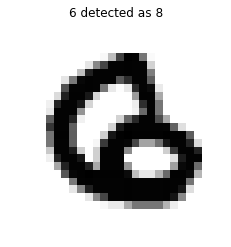

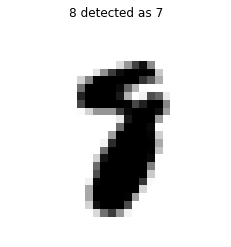

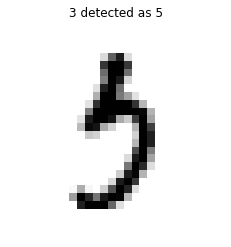

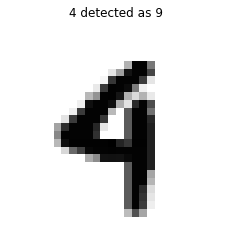

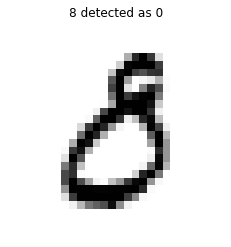

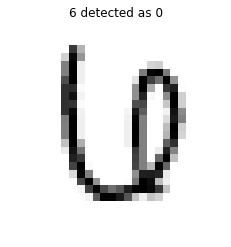

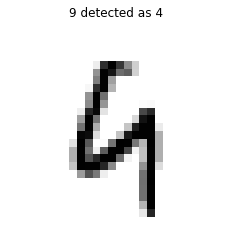

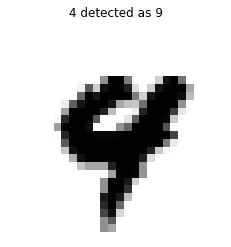

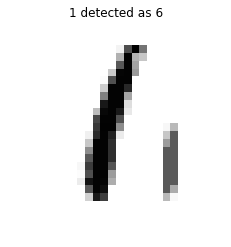

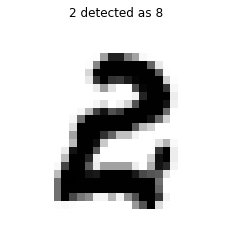

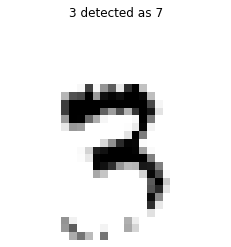

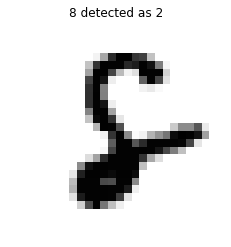

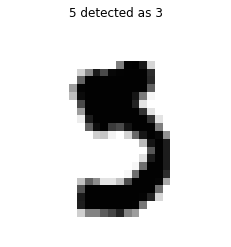

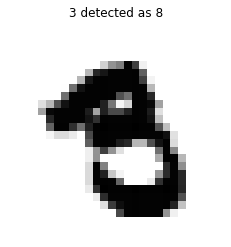

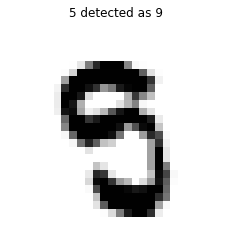

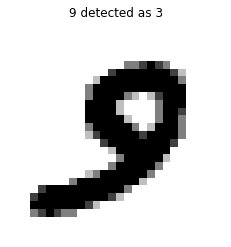

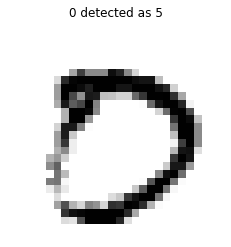

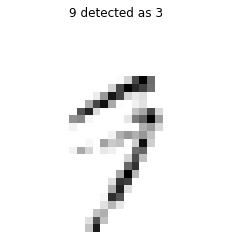

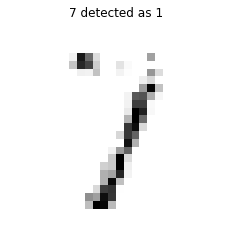

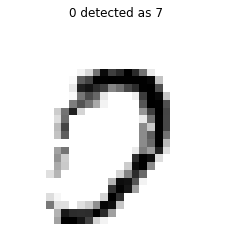

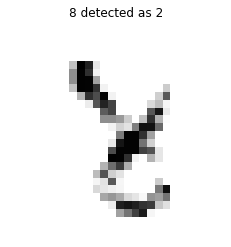

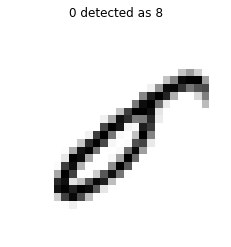

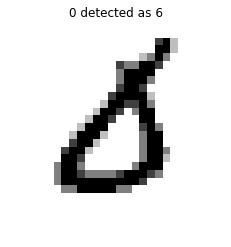

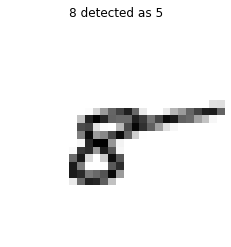

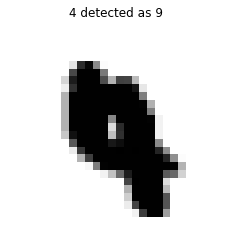

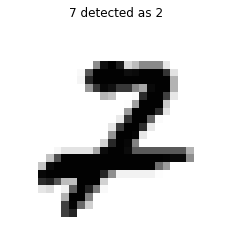

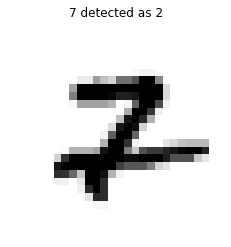

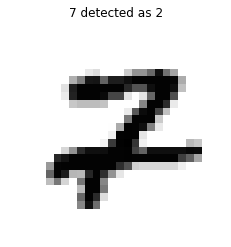

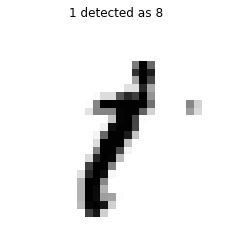

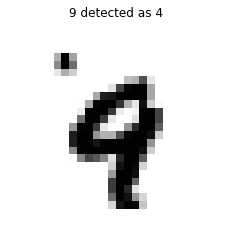

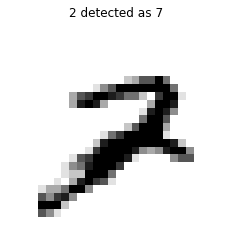

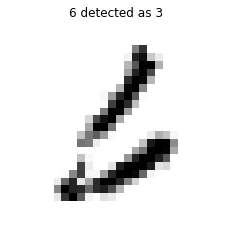

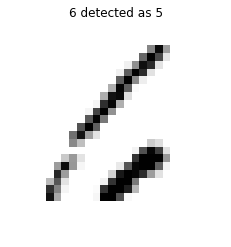

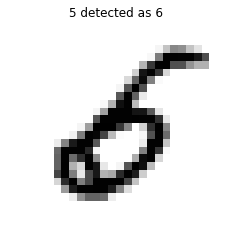

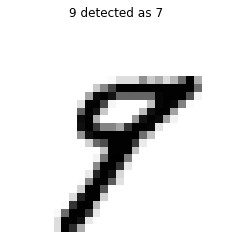

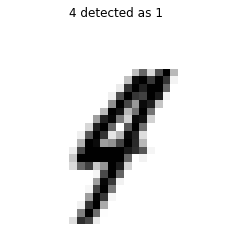

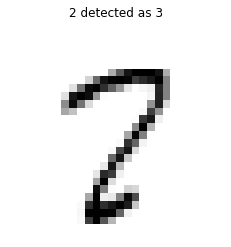

In [10]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()